# Code Structure

## The Analysis of the dataset is organised as follows

###     *The Analysis code will be organized into the following sections:*
####    1.) *Introduction*
####    2.) *Data Loading and Preprocessing  : Loading the Sports dataset and preparing it for analysis.*
####    3.) *Exploratory Data Analysis: Conducting exploratory analysis to gain insights into the dataset's characteristics.*
####    4.) *Predictive analysis: Conducting predictive analysis to predict certain outcomes based on historical data*
####    5.) *Conclusion*

# Introduction

# Data Loading and Preprocessing

#### Original dataset : https://github.com/Madhusshree13/Internship-phase-2-daily-logs/blob/main/CapstoneProject-2/Sports%20dataset.csv
#### Preprocessing data file : 
#### Preprocessed dataset :

# Explorartory Data Analysis


- Exploratory Data Analysis (EDA) is a crucial initial step in the data analysis process, involving the systematic exploration and visualization of a dataset to uncover patterns, trends, and insights. 
- Through descriptive statistics, data visualization, and hypothesis generation, EDA provides a comprehensive understanding of the dataset's structure and relationships, guiding subsequent analyses and informing decision-making processes.
#### Steps in EDA include:

- Descriptive Analysis: Summarizing main data characteristics.
- Univariate Analysis: Examining individual variable distributions.
- Bivariate Analysis: Exploring relationships between pairs of variables.
- Demographic analysis: Examining population characteristics like age, gender, etc to understand trends, distributions, within a group or region.
- Temporal Analysis: Analyzing data trends over time.


## Descriptive Statistics

### Importing Necessary libraries

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scipy
from sklearn.preprocessing import MinMaxScaler

### Reading CSV

In [62]:
df=pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\Sports_analysis_capstone\\new_dataset.csv")
print(df.head(5))

   Played_Id    Player    Team  Age  Position  Assists  YellowCards  RedCards  \
0          0  player c  team c   31  defender        2            4         3   
1          1  player d  team c   22  defender       16            8         2   
2          2  player a  team c   27  defender       13            8         0   
3          3  player c  team c   29   forward        1            3         3   
4          4  player c  team c   27  defender        8            1         2   

   PassCompletionRate  DistanceCovered  ...  InjuryHistory  TrainingHours  \
0           81.644912        10.883001  ...              0             18   
1           76.288018         5.650024  ...              8             15   
2           78.247265         9.236842  ...              8             17   
3           99.742740         8.523576  ...              4             19   
4           51.430636         7.239479  ...              1              6   

   Season  Goals_winsorized  Height_winsorized  We

### Displaying total number of rows and columns

In [63]:
rows,columns=df.shape
print("The total number of rows is",df.shape[0],"and the total number of columns is",df.shape[1])


The total number of rows is 16628 and the total number of columns is 26


### Displaying the columns 

In [64]:
print(df.columns)
print("The total number of columns is",df.shape[1])


Index(['Played_Id', 'Player', 'Team', 'Age', 'Position', 'Assists',
       'YellowCards', 'RedCards', 'PassCompletionRate', 'DistanceCovered',
       'Sprints', 'ShotsOnTarget', 'TacklesWon', 'CleanSheets',
       'PlayerFatigue', 'MatchPressure', 'InjuryHistory', 'TrainingHours',
       'Season', 'Goals_winsorized', 'Height_winsorized', 'Weight_winsorized',
       'FatigueInjuryCorrelation_winsorized',
       'PressurePerformanceImpact_winsorized', 'EffectiveTraining_winsorized',
       'Goals'],
      dtype='object')
The total number of columns is 26


### Displaying the data types of columns

In [65]:
print("The datatypes of the columns are: ")
print(df.dtypes)

The datatypes of the columns are: 
Played_Id                                 int64
Player                                   object
Team                                     object
Age                                       int64
Position                                 object
Assists                                   int64
YellowCards                               int64
RedCards                                  int64
PassCompletionRate                      float64
DistanceCovered                         float64
Sprints                                   int64
ShotsOnTarget                             int64
TacklesWon                                int64
CleanSheets                               int64
PlayerFatigue                           float64
MatchPressure                             int64
InjuryHistory                             int64
TrainingHours                             int64
Season                                    int64
Goals_winsorized                          int64
Heigh

### Column of int datatype

In [66]:
int_columns = df.select_dtypes(include='int').columns
print("Columns with integer data type:")
for col in int_columns:
    print(col)

Columns with integer data type:
Played_Id
Age
Assists
YellowCards
RedCards
Sprints
ShotsOnTarget
TacklesWon
CleanSheets
MatchPressure
InjuryHistory
TrainingHours
Season
Goals_winsorized


### Columns of float datatype

In [67]:
float_columns = df.select_dtypes(include='float').columns
print("Columns with float data type:")
for col in float_columns:
    print(col)

Columns with float data type:
PassCompletionRate
DistanceCovered
PlayerFatigue
Height_winsorized
Weight_winsorized
FatigueInjuryCorrelation_winsorized
PressurePerformanceImpact_winsorized
EffectiveTraining_winsorized
Goals


### Columns of object datatype

In [68]:
obj_columns = df.select_dtypes(include='object').columns
print("Columns with obj data type:")
for col in obj_columns:
    print(col)

Columns with obj data type:
Player
Team
Position


### Desccribing the columns using statistics

In [69]:
print(df.describe(include='all'))

           Played_Id    Player    Team           Age    Position  \
count   16628.000000     16628   16628  16628.000000       16628   
unique           NaN         4       3           NaN           4   
top              NaN  player a  team c           NaN  goalkeeper   
freq             NaN      4392    5600           NaN        4398   
mean     2504.895117       NaN     NaN     28.580888         NaN   
std      1438.938794       NaN     NaN      6.313201         NaN   
min         0.000000       NaN     NaN     18.000000         NaN   
25%      1257.000000       NaN     NaN     23.000000         NaN   
50%      2508.500000       NaN     NaN     29.000000         NaN   
75%      3754.000000       NaN     NaN     34.000000         NaN   
max      4999.000000       NaN     NaN     39.000000         NaN   

             Assists   YellowCards      RedCards  PassCompletionRate  \
count   16628.000000  16628.000000  16628.000000        16628.000000   
unique           NaN           NaN     

### Number of Participants

In [70]:
unique_participants = df['Played_Id'].nunique()
print("Unique number of participants:")
print(unique_participants)

Unique number of participants:
5000


### Number of participants by team

In [71]:
print("Number of participants by team:")
team_counts=df['Team'].value_counts()
print(team_counts)

Number of participants by team:
team c    5600
team b    5577
team a    5451
Name: Team, dtype: int64


C:\Users\madhu\AppData\Local\Temp\ipykernel_20596\2493044535.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




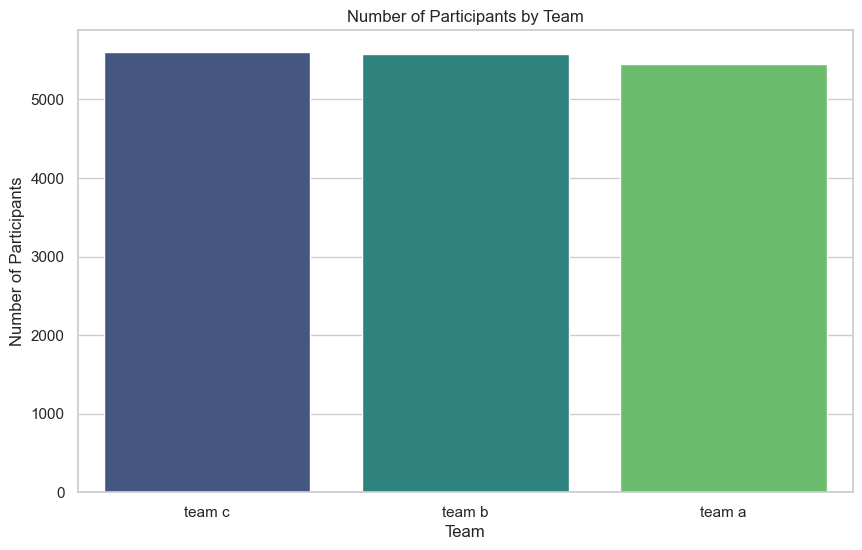

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Team'].value_counts().index, y=df['Team'].value_counts().values, palette='viridis')
plt.title('Number of Participants by Team')
plt.xlabel('Team')
plt.ylabel('Number of Participants')
plt.show()

### Number of participants by Season

In [73]:
print("Number of participants by Season:")
print(df['Season'].value_counts())

Number of participants by Season:
2022    4211
2020    4189
2019    4156
2021    4072
Name: Season, dtype: int64


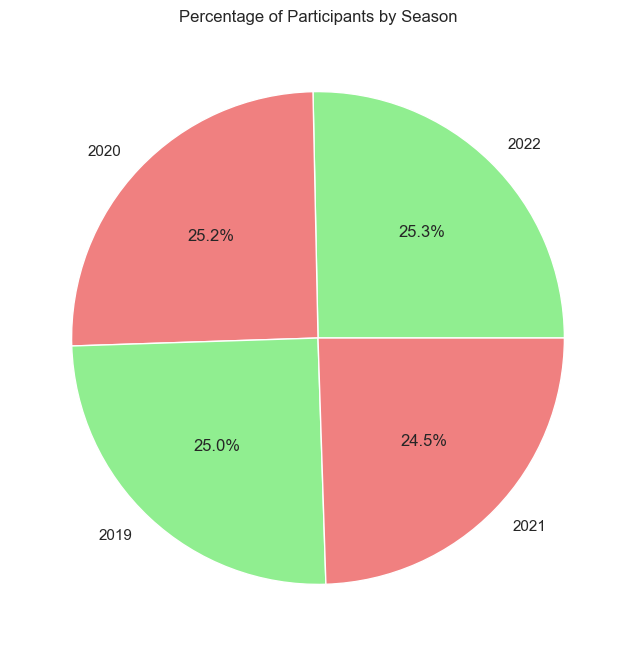

In [74]:
plt.figure(figsize=(8, 8))
df['Season'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral']) #Colour reference from online
plt.title('Percentage of Participants by Season')
plt.ylabel('')
plt.show()

## Univariate Analysis


- Univariate analysis involves examining a single variable at a time to understand its distribution, central tendency, and variability. 
- It provides insights into the characteristics of individual variables, such as counts, frequencies, and summary statistics, without considering relationships with other variables

### Subplots for each column against their frequency

Text(0, 0.5, 'Frequency')

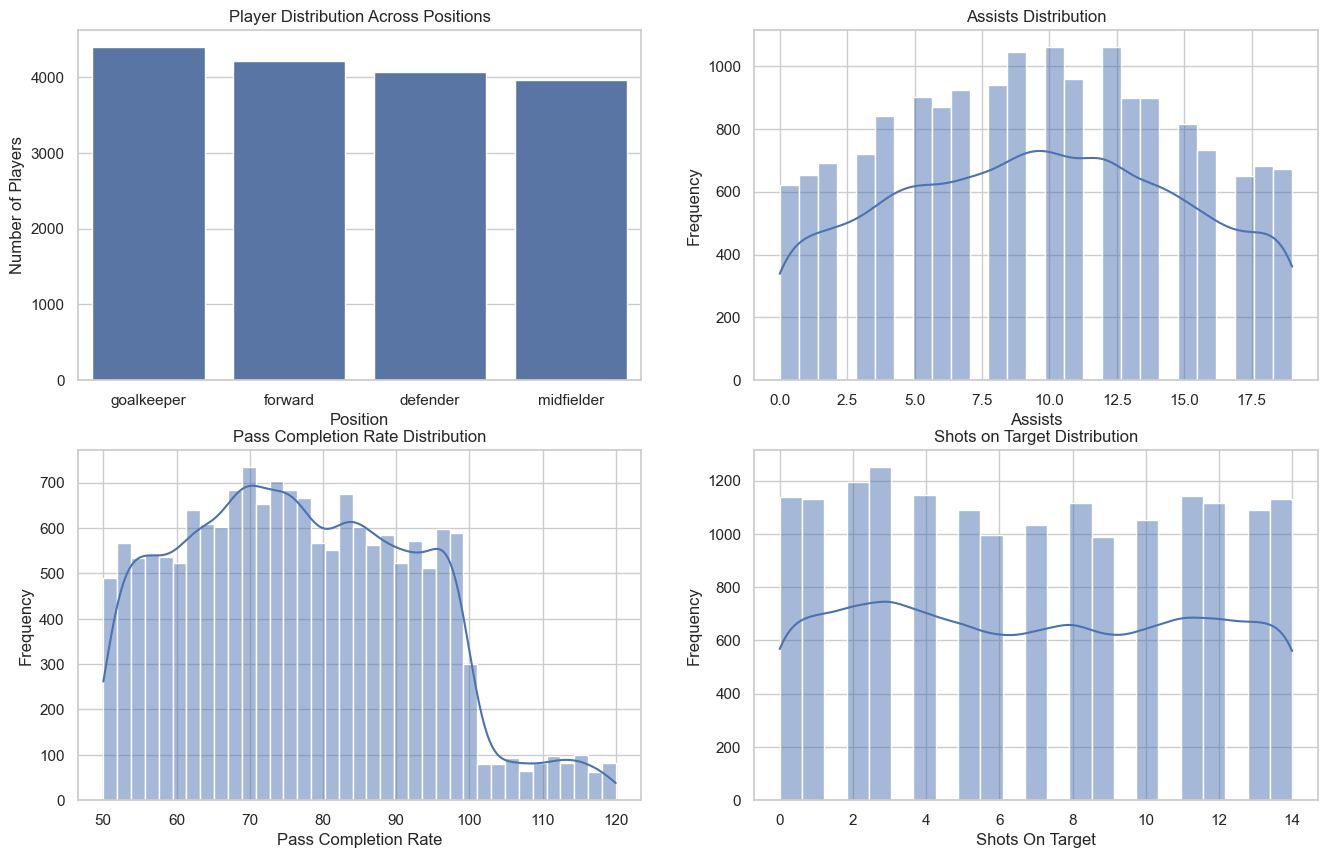

In [75]:

sns.set(style="whitegrid")
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Player Distribution Across Positions
sns.countplot(data=df, x='Position', order=df['Position'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('Player Distribution Across Positions')
axes[0, 0].set_xlabel('Position')
axes[0, 0].set_ylabel('Number of Players')

# Assists Distribution
sns.histplot(df['Assists'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Assists Distribution')
axes[0, 1].set_xlabel('Assists')
axes[0, 1].set_ylabel('Frequency')

# Pass Completion Rate Distribution
sns.histplot(df['PassCompletionRate'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Pass Completion Rate Distribution')
axes[1, 0].set_xlabel('Pass Completion Rate')
axes[1, 0].set_ylabel('Frequency')

# Shots on Target Distribution
sns.histplot(df['ShotsOnTarget'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Shots on Target Distribution')
axes[1, 1].set_xlabel('Shots On Target')
axes[1, 1].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

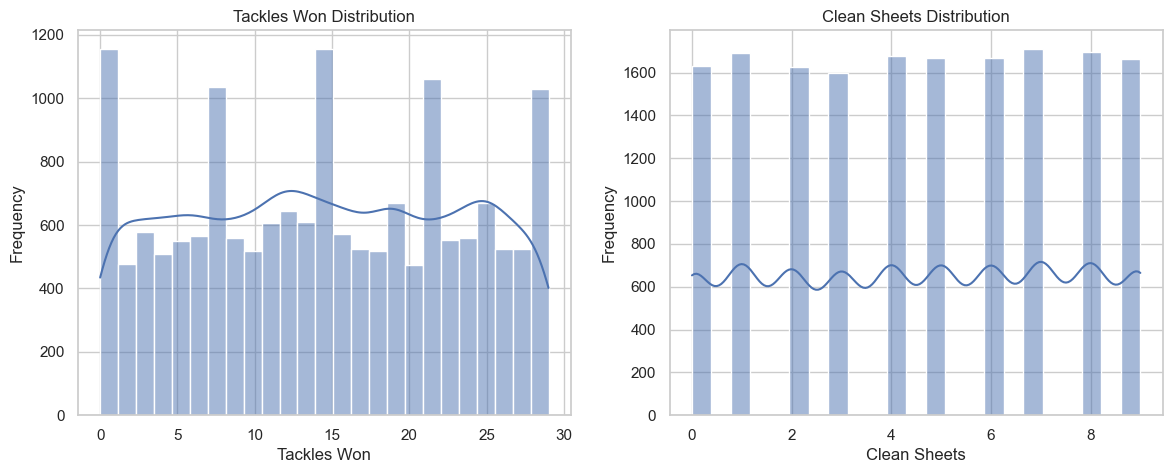

In [76]:

sns.set(style="whitegrid")
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tackles Won Distribution
sns.histplot(df['TacklesWon'], kde=True, ax=axes[0])
axes[0].set_title('Tackles Won Distribution')
axes[0].set_xlabel('Tackles Won')
axes[0].set_ylabel('Frequency')

# Clean Sheets Distribution
sns.histplot(df['CleanSheets'], kde=True, ax=axes[1])
axes[1].set_title('Clean Sheets Distribution')
axes[1].set_xlabel('Clean Sheets')
axes[1].set_ylabel('Frequency')



## Business Analytics

#### KPI's 
- KPI- Key Performance Indicator
- In our context, we choose KPI's for each player position and analyze accordingly
- The Player position are : Goalkeeper, Midfielder, Forward, Defender.

- Goalkeeper KPI : CleanSheets, PassCompletionRate, ShotsOnTarget, PressurePerformanceImpact
- Midfielder KPI : Assists, PassCompletionRate, DistanceCovered, Sprints
- Defender KPI   : TacklesWon, Assists, YellowCards, RedCards
- Forward KPI   : Assists, Goals, ShotsOnTarget, PressurePerformanceImpact, EffectiveTraining,PlayerFatigue

## Goalkeeper focused

In [77]:
goalkeeper_count = df[df['Position'] == 'goalkeeper'].shape[0]
print("The Number of players labeled as goalkeepers:", goalkeeper_count)

The Number of players labeled as goalkeepers: 4398


#### Target : High CleanSheet, High PassCompletionRate, High ShotsOnTarget, High PressureperformanceImpact to select the top players

## CleanSheet Analysis

#### High CleanSheet Player_Id's

In [78]:
goalkeeper_data = df[df['Position'] == 'goalkeeper']
high_clean_sheet_players = goalkeeper_data[goalkeeper_data['CleanSheets'] > 8]
unique_played_ids = high_clean_sheet_players['Played_Id'].unique()
print("Unique Played_Id values of players with high CleanSheet values in the goalkeeper position:")
for played_id in unique_played_ids:
    clean_sheet_value = high_clean_sheet_players.loc[high_clean_sheet_players['Played_Id'] == played_id, 'CleanSheets'].iloc[0]
    print(f"Played_Id: {played_id}, CleanSheets: {clean_sheet_value}")

Unique Played_Id values of players with high CleanSheet values in the goalkeeper position:
Played_Id: 11, CleanSheets: 9
Played_Id: 19, CleanSheets: 9
Played_Id: 74, CleanSheets: 9
Played_Id: 79, CleanSheets: 9
Played_Id: 110, CleanSheets: 9
Played_Id: 123, CleanSheets: 9
Played_Id: 185, CleanSheets: 9
Played_Id: 214, CleanSheets: 9
Played_Id: 215, CleanSheets: 9
Played_Id: 245, CleanSheets: 9
Played_Id: 250, CleanSheets: 9
Played_Id: 258, CleanSheets: 9
Played_Id: 369, CleanSheets: 9
Played_Id: 402, CleanSheets: 9
Played_Id: 434, CleanSheets: 9
Played_Id: 487, CleanSheets: 9
Played_Id: 546, CleanSheets: 9
Played_Id: 572, CleanSheets: 9
Played_Id: 576, CleanSheets: 9
Played_Id: 582, CleanSheets: 9
Played_Id: 643, CleanSheets: 9
Played_Id: 680, CleanSheets: 9
Played_Id: 765, CleanSheets: 9
Played_Id: 801, CleanSheets: 9
Played_Id: 1024, CleanSheets: 9
Played_Id: 1122, CleanSheets: 9
Played_Id: 1175, CleanSheets: 9
Played_Id: 1186, CleanSheets: 9
Played_Id: 1223, CleanSheets: 9
Played_Id

#### Low CleanSheet Played_id's

In [79]:
goalkeeper_data = df[df['Position'] == 'goalkeeper']
low_clean_sheet_players = goalkeeper_data[goalkeeper_data['CleanSheets'] < 3]
unique_played_ids = low_clean_sheet_players['Played_Id'].unique()
print("Unique Played_Id values of players with low CleanSheet values in the goalkeeper position:")
for played_id in unique_played_ids:
    clean_sheet_value = low_clean_sheet_players.loc[low_clean_sheet_players['Played_Id'] == played_id, 'CleanSheets'].iloc[0]
    print(f"Played_Id: {played_id}, CleanSheets: {clean_sheet_value}")

Unique Played_Id values of players with low CleanSheet values in the goalkeeper position:
Played_Id: 8, CleanSheets: 1
Played_Id: 9, CleanSheets: 2
Played_Id: 28, CleanSheets: 0
Played_Id: 51, CleanSheets: 2
Played_Id: 92, CleanSheets: 1
Played_Id: 104, CleanSheets: 2
Played_Id: 122, CleanSheets: 0
Played_Id: 130, CleanSheets: 0
Played_Id: 149, CleanSheets: 1
Played_Id: 153, CleanSheets: 0
Played_Id: 159, CleanSheets: 2
Played_Id: 167, CleanSheets: 2
Played_Id: 191, CleanSheets: 0
Played_Id: 195, CleanSheets: 2
Played_Id: 202, CleanSheets: 0
Played_Id: 224, CleanSheets: 0
Played_Id: 233, CleanSheets: 0
Played_Id: 240, CleanSheets: 1
Played_Id: 247, CleanSheets: 1
Played_Id: 248, CleanSheets: 0
Played_Id: 249, CleanSheets: 1
Played_Id: 270, CleanSheets: 1
Played_Id: 281, CleanSheets: 2
Played_Id: 282, CleanSheets: 0
Played_Id: 298, CleanSheets: 1
Played_Id: 335, CleanSheets: 0
Played_Id: 337, CleanSheets: 2
Played_Id: 359, CleanSheets: 2
Played_Id: 361, CleanSheets: 1
Played_Id: 370, Cl

## PassCompletionrate Analysis

#### Highest PassCompletionrate Played_Id's

In [80]:
goalkeeper_data = df[df['Position'] == 'goalkeeper']
sorted_goalkeeper_data = goalkeeper_data.sort_values(by='PassCompletionRate', ascending=False)
top_10_goalkeepers = sorted_goalkeeper_data.head(25)
if not top_10_goalkeepers.empty:
    print("Top 10 goalkeepers with the highest PassCompletionRate:")
    print(top_10_goalkeepers[['Played_Id', 'PassCompletionRate']].drop_duplicates().reset_index(drop=True))
else:
    print("No goalkeepers found in the dataset.")


Top 10 goalkeepers with the highest PassCompletionRate:
    Played_Id  PassCompletionRate
0        3541          119.988897
1         228          119.867121
2        1638          119.855933
3        1282          119.637788
4        4174          119.526223
5        1970          119.380316
6        4632          119.095494
7        1622          118.793800
8        3258          118.752281
9         334          118.741545
10       1900          118.644086


#### Low PassCompletionrate Played_Id's

In [81]:
goalkeeper_data = df[df['Position'] == 'goalkeeper']
sorted_goalkeeper_data = goalkeeper_data.sort_values(by='PassCompletionRate')
top_10_goalkeepers = sorted_goalkeeper_data.head(25)
if not top_10_goalkeepers.empty:
    print("Top 10 goalkeepers with the lowest PassCompletionRate:")
    print(top_10_goalkeepers[['Played_Id', 'PassCompletionRate']].drop_duplicates().reset_index(drop=True))
else:
    print("No goalkeepers found in the dataset.")


Top 10 goalkeepers with the lowest PassCompletionRate:
   Played_Id  PassCompletionRate
0       2630           50.010158
1       1493           50.041818
2       3574           50.050350
3       4837           50.168166
4       1159           50.308841
5       4320           50.333377
6        202           50.366876
7       1550           50.392610
8       1770           50.492857
9       2116           50.555209


In [82]:
import plotly.express as px

# Define the intervals for Pass Completion Rate
intervals = [0, 25, 50, 75, 100, 125]

# Create labels for the intervals
labels = ['0-25', '26-50', '51-75', '76-100', '101-125']

# Split PassCompletionRate values into intervals
goalkeeper_data['PassCompletionRateInterval'] = pd.cut(goalkeeper_data['PassCompletionRate'], bins=intervals, labels=labels, include_lowest=True)

# Count the occurrences within each interval
pass_completion_rate_counts = goalkeeper_data['PassCompletionRateInterval'].value_counts()

# Create a Pie chart using Plotly
fig = px.pie(names=pass_completion_rate_counts.index, values=pass_completion_rate_counts.values, title='Pass Completion Rate Distribution')
fig.show()


C:\Users\madhu\AppData\Local\Temp\ipykernel_20596\3073024358.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Highest ShotsOnTarget

In [83]:
# Filter the DataFrame for players with Position as 'goalkeeper'
goalkeeper_data = df[df['Position'] == 'goalkeeper']

# Sort the DataFrame based on ShotsOnTarget in descending order
sorted_goalkeeper_data = goalkeeper_data.sort_values(by='ShotsOnTarget', ascending=False)

# Select the top 11 goalkeepers after sorting
top_11_goalkeepers = sorted_goalkeeper_data.head(25)

# Print the top 11 goalkeepers with their Played_Id and ShotsOnTarget values
if not top_11_goalkeepers.empty:
    print("Top 11 goalkeepers with the highest ShotsOnTarget:")
    print(top_11_goalkeepers[['Played_Id', 'ShotsOnTarget']].drop_duplicates().reset_index(drop=True))
else:
    print("No goalkeepers found in the dataset.")


Top 11 goalkeepers with the highest ShotsOnTarget:
    Played_Id  ShotsOnTarget
0        4678             14
1        2420             14
2        4145             14
3        3519             14
4         385             14
5        3175             14
6         483             14
7        2559             14
8        2558             14
9        2542             14
10       2527             14
11       4137             14
12       1223             14
13        625             14
14       4680             14
15       2392             14
16       2364             14
17       2153             14
18       2035             14
19       1328             14
20       4934             14
21       2181             14


#### Lowest ShotsOnTarget Played_Id's

In [84]:
# Filter the DataFrame for players with Position as 'goalkeeper'
goalkeeper_data = df[df['Position'] == 'goalkeeper']

# Sort the DataFrame based on ShotsOnTarget in ascending order
sorted_goalkeeper_data = goalkeeper_data.sort_values(by='ShotsOnTarget', ascending=True)

# Select the first 11 goalkeepers after sorting
bottom_11_goalkeepers = sorted_goalkeeper_data.head(11)

# Print the bottom 11 goalkeepers with their Played_Id and ShotsOnTarget values
if not bottom_11_goalkeepers.empty:
    print("Bottom 11 goalkeepers with the lowest ShotsOnTarget:")
    print(bottom_11_goalkeepers[['Played_Id', 'ShotsOnTarget']].drop_duplicates().reset_index(drop=True))
else:
    print("No goalkeepers found in the dataset.")
    


Bottom 11 goalkeepers with the lowest ShotsOnTarget:
   Played_Id  ShotsOnTarget
0        191              0
1       2982              0
2       2680              0
3       1501              0
4       3615              0
5       4663              0
6       1924              0
7       3265              0
8       1834              0
9       1685              0


In [85]:
import plotly.express as px

# Count the occurrences of Shots on Target values
shots_on_target_counts = goalkeeper_data['ShotsOnTarget'].value_counts()

# Calculate the percentage of Shots on Target values
shots_on_target_percentages = (shots_on_target_counts / shots_on_target_counts.sum()) * 100

# Create a Pie chart using Plotly
fig = px.pie(names=shots_on_target_percentages.index, values=shots_on_target_percentages.values, title='Shots on Target Distribution for Goalkeepers')
fig.show()



### PressurePerformanceImpact Analysis for Goalkeepers

In [86]:
goalkeeper_data = df[(df['Position'] == 'goalkeeper') & (df['PressurePerformanceImpact_winsorized'] <= 10)]
sorted_goalkeeper_data = goalkeeper_data.sort_values(by='PressurePerformanceImpact_winsorized', ascending=False)
top_15_goalkeepers = sorted_goalkeeper_data.head(15)[['Played_Id', 'PressurePerformanceImpact_winsorized']]
print("Top 15 Goalkeepers with Pressure Performance Impact <= 10:")
print(top_15_goalkeepers)


Top 15 Goalkeepers with Pressure Performance Impact <= 10:
       Played_Id  PressurePerformanceImpact_winsorized
12766       2041                             10.000000
2041        2041                             10.000000
14093       2041                             10.000000
4194        4194                              9.833333
16189       1323                              9.833333
6185        1323                              9.833333
1323        1323                              9.833333
8124        1323                              9.833333
10204       4512                              9.800000
12165       4512                              9.800000
4512        4512                              9.800000
6904        4512                              9.800000
4572        4572                              9.750000
9285        4572                              9.750000
3084        3084                              9.714286


In [87]:
goalkeeper_data = df[df['Position'] == 'goalkeeper']
sorted_goalkeeper_data = goalkeeper_data.sort_values(by='PressurePerformanceImpact_winsorized')
Bottom_15_goalkeepers = sorted_goalkeeper_data.head(30)[['Played_Id', 'PressurePerformanceImpact_winsorized']]
print("Bottom 15 Goalkeepers with lowest Pressure Performance Impact:")
print(Bottom_15_goalkeepers)

Bottom 15 Goalkeepers with lowest Pressure Performance Impact:
       Played_Id  PressurePerformanceImpact_winsorized
9561        3122                              0.007380
3122        3122                              0.007380
13986       3122                              0.007380
6805        2552                              0.007663
2552        2552                              0.007663
4068        4068                              0.007968
10396       4068                              0.007968
5647        4068                              0.007968
11305       4346                              0.011494
7630        4346                              0.011494
4346        4346                              0.011494
13945       4606                              0.027491
10494       4606                              0.027491
15778       4606                              0.027491
4606        4606                              0.027491
6368        4606                              0.027491
99

In [88]:
import plotly.express as px

# Filter the DataFrame for goalkeepers
goalkeeper_data = df[df['Position'] == 'goalkeeper']

# Round off the Pressure Performance Impact values and convert them to integers
goalkeeper_data['RoundedPressurePerformanceImpact'] = goalkeeper_data['PressurePerformanceImpact_winsorized'].round().astype(int)

# Calculate the percentage of rounded Pressure Performance Impact values
pressure_performance_impact_counts = goalkeeper_data['RoundedPressurePerformanceImpact'].value_counts(normalize=True) * 100

# Create a bar plot using Plotly
fig = px.bar(x=pressure_performance_impact_counts.index, y=pressure_performance_impact_counts.values,
             labels={'x': 'Rounded Pressure Performance Impact', 'y': 'Percentage'},
             title='Pressure Performance Impact Distribution for Goalkeepers (Rounded)',
             text=pressure_performance_impact_counts.values, 
             hover_data={'x': pressure_performance_impact_counts.index, 'y': pressure_performance_impact_counts.values},
             color=pressure_performance_impact_counts.index,
             color_continuous_scale='Blues')
fig.update_layout(xaxis=dict(type='category'), yaxis=dict(title='Percentage'))
fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.show()


C:\Users\madhu\AppData\Local\Temp\ipykernel_20596\3123271463.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## GoalKeeper Analysis to retrieve the top 20 goalkeepers based on the composite score

In [89]:
# Filter the DataFrame for goalkeepers with 'PressurePerformanceImpact_winsorized' values less than or equal to 10
goalkeeper_data_filtered = goalkeeper_data[goalkeeper_data['PressurePerformanceImpact_winsorized'] <= 10]

# Extract the relevant KPIs
kpi_columns = ['CleanSheets', 'PassCompletionRate', 'ShotsOnTarget', 'PressurePerformanceImpact_winsorized']
kpi_data = goalkeeper_data_filtered[kpi_columns]

# Normalize the KPIs using MinMaxScaler
scaler = MinMaxScaler()
normalized_kpi_data = scaler.fit_transform(kpi_data)

# Create a composite score by summing the normalized KPI values
composite_scores = normalized_kpi_data.sum(axis=1)

# Add the composite scores to the goalkeeper_data DataFrame
goalkeeper_data_filtered['CompositeScore'] = composite_scores

# Drop duplicate Played_Id values, keeping the row with the highest composite score for each Played_Id
goalkeeper_data_unique = goalkeeper_data_filtered.sort_values(by='CompositeScore', ascending=False).drop_duplicates(subset='Played_Id')

# Sort the goalkeepers based on the composite score in descending order
sorted_goalkeeper_data = goalkeeper_data_unique.sort_values(by='CompositeScore', ascending=False)

# Select the top 20 goalkeepers
top_20_goalkeepers = sorted_goalkeeper_data.head(20)

# Print the top 20 Played_Id values and their composite scores
print("Top 20 goalkeepers with PressurePerformanceImpact_winsorized <= 10 based on composite KPI score:")
print(top_20_goalkeepers[['Played_Id', 'CompositeScore']])

# If you want to see more details, you can include the KPI columns as well
print(top_20_goalkeepers[['Played_Id', 'CleanSheets', 'PassCompletionRate', 'ShotsOnTarget', 'PressurePerformanceImpact_winsorized', 'CompositeScore']])


Top 20 goalkeepers with PressurePerformanceImpact_winsorized <= 10 based on composite KPI score:
       Played_Id  CompositeScore
9285        4572        3.668114
16509        214        3.478564
4210        4210        3.433301
6439        2813        3.253716
15015       2763        3.204483
6696         338        3.175752
12053       1223        3.164988
5538         780        3.057994
215          215        3.050317
10672       2210        3.030135
9684        3541        3.014855
7009         934        2.996246
10690       3550        2.943258
13454       3526        2.925105
6022        4137        2.920466
12266       1282        2.912953
5079        4713        2.902564
3591        3591        2.900243
4194        4194        2.878306
10138       1598        2.878084
       Played_Id  CleanSheets  PassCompletionRate  ShotsOnTarget  \
9285        4572            9           98.514672             14   
16509        214            9           95.500971             13   
4210  

C:\Users\madhu\AppData\Local\Temp\ipykernel_20596\123321331.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## The visualization of the top 20 goalkeepers along with the visualization

In [90]:
import plotly.express as px

# Create the bar plot for the top 20 goalkeepers based on composite scores
fig = px.bar(top_20_goalkeepers, x='Played_Id', y='CompositeScore',
             title='Top 20 Goalkeepers Based on Composite KPI Score',
             labels={'Played_Id': 'Played ID', 'CompositeScore': 'Composite Score'},
             text='CompositeScore')

# Update the layout for better visualization
fig.update_layout(
    xaxis=dict(type='category', categoryorder='total descending'),
    yaxis=dict(title='Composite Score'),
    xaxis_title='Played ID',
    yaxis_title='Composite Score',
    showlegend=False
)

# Show the plot
fig.show()


# Midfielder Focused

-Assists

-PassCompletionRate

-DistanceCovered

-Sprints

## Assists Analysis

#### Highest Assists valued Player_Id's

In [91]:
midfielder_data = df[df['Position'] == 'midfielder']
sorted_midfielder_data = midfielder_data.sort_values(by='Assists', ascending=False)
# Select the top 20 Midfielders based on Assists
top_20_midfielders = sorted_midfielder_data.head(30)
# Return the Played_Id along with Assists for these top 20 players
print("Top 20 midfielders based on the number of assists:")
print(top_20_midfielders[['Played_Id', 'Assists']].drop_duplicates().reset_index(drop=True))

Top 20 midfielders based on the number of assists:
    Played_Id  Assists
0        3813       19
1        2719       19
2        1797       19
3        3808       19
4        4894       19
5        3279       19
6        1605       19
7        4015       19
8        3362       19
9        1412       19
10       3331       19
11       1580       19
12       4582       19
13       2554       19
14       2058       19
15        889       19
16       1066       19
17       3289       19
18       1511       19
19       1395       19
20        396       19
21       2377       19
22       4023       19
23       1814       19
24       4147       19


#### Lowest Assists valued Player_Id's

In [92]:
midfielder_data = df[df['Position'] == 'midfielder']
sorted_midfielder_data_asc = midfielder_data.sort_values(by='Assists', ascending=True)
# Select the bottom 20 Midfielders based on Assists
bottom_20_midfielders = sorted_midfielder_data_asc.head(20)
# Return the Played_Id along with Assists for these bottom 20 players
print("Bottom 20 midfielders based on the number of assists:")
print(bottom_20_midfielders[['Played_Id', 'Assists']].drop_duplicates().reset_index(drop=True))

Bottom 20 midfielders based on the number of assists:
    Played_Id  Assists
0        3330        0
1        3990        0
2        3355        0
3         772        0
4         287        0
5        1193        0
6        3966        0
7        4377        0
8         920        0
9        2327        0
10       3095        0
11        981        0
12       3803        0


#### Visualization plot for Asssist Occurence for each value

In [93]:
import plotly.express as px

# Calculate the value counts of assists
assist_counts = df['Assists'].value_counts()

# Calculate the percentage of assist occurrences
assist_percentages = (assist_counts / assist_counts.sum()) * 100

# Create a pie chart using Plotly
fig = px.pie(names=assist_percentages.index, values=assist_percentages.values,
             title='Percentage of Assist Occurrences',
             labels={'names': 'Assist Value', 'values': 'Percentage'})

# Show the plot
fig.show()


## PassCompletionRate Analysis

#### Highest-Top 25 PassCompletionRate Player_Id

In [94]:
midfielder_data = df[df['Position'] == 'midfielder']
top_midfielders = midfielder_data.sort_values(by='PassCompletionRate', ascending=False).head(25)
# Drop duplicates based on the Played_Id column
top_midfielders_unique = top_midfielders.drop_duplicates(subset='Played_Id')
print("Top 20 midfielders by Pass Completion Rate:")
print(top_midfielders_unique[['Played_Id', 'PassCompletionRate']])


Top 20 midfielders by Pass Completion Rate:
       Played_Id  PassCompletionRate
7652        4992          119.985373
5272        1202          119.236231
9288        3556          119.235890
8439        1711          119.137182
4773        4773          119.132990
3013        3013          119.018369
629          629          118.970912
10563       3210          118.970909
380          380          118.930769
7359         774          118.597344
4442        4442          118.535735
440          440          118.528741
8294        3990          118.501755
9529        1561          118.272593
3544        3544          117.704537
12983       2580          117.644754
2449        2449          117.586420


#### Bottom 20 PassCompletionrate Player_Id's

In [95]:
# Sort the midfielders by PassCompletionRate in ascending order and select the bottom 20
bottom_midfielders_pass_completion_rate = midfielder_data.sort_values(by='PassCompletionRate').head(20)

# Drop duplicates based on the Played_Id column
bottom_midfielders_pass_completion_rate_unique = bottom_midfielders_pass_completion_rate.drop_duplicates(subset='Played_Id')

# Display the unique Played_Id values along with their corresponding PassCompletionRate
print("Bottom 20 midfielders by Pass Completion Rate:")
print(bottom_midfielders_pass_completion_rate_unique[['Played_Id', 'PassCompletionRate']])


Bottom 20 midfielders by Pass Completion Rate:
       Played_Id  PassCompletionRate
3330        3330           50.048184
4235        4235           50.091832
852          852           50.095601
593          593           50.118902
2751        2751           50.127313
10933       3227           50.203972
1363        1363           50.205379
4994        4994           50.296361


In [96]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame and it has the 'PassCompletionRate' column

# Define the bins and labels for quarters
bins = [0, 25, 50, 75, 100, 125]
labels = ['0-25', '26-50', '51-75', '76-100', '101-125']

# Create a new column to categorize PassCompletionRate into quarters
df['PassCompletionRateQuarter'] = pd.cut(df['PassCompletionRate'], bins=bins, labels=labels, include_lowest=True)

# Calculate the count of PassCompletionRate values in each quarter
pass_completion_rate_counts = df['PassCompletionRateQuarter'].value_counts().sort_index()

# Calculate the percentage of PassCompletionRate values falling within each quarter
pass_completion_rate_percentages = (pass_completion_rate_counts / pass_completion_rate_counts.sum()) * 100

# Create a bar chart using Plotly
fig = px.bar(x=pass_completion_rate_percentages.index, y=pass_completion_rate_percentages.values,
             labels={'x': 'Pass Completion Rate Quarter', 'y': 'Percentage'},
             title='Pass Completion Rate Distribution in Quarters',
             text=pass_completion_rate_percentages.values)

# Update layout for better visualization
fig.update_layout(xaxis_title='Pass Completion Rate Quarter', yaxis_title='Percentage')
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Show the plot
fig.show()


## DistanceCovered Analysis

#### Highest-Top 20 DistanceCovered Player_Id

In [97]:
# Filter the DataFrame for midfielders
midfielder_data = df[df['Position'] == 'midfielder']

# Sort the midfielders by DistanceCovered in descending order and select the top 20
top_midfielders_distance = midfielder_data.sort_values(by='DistanceCovered', ascending=False).head(50)

# Drop duplicates based on the Played_Id column
top_midfielders_distance_unique = top_midfielders_distance.drop_duplicates(subset='Played_Id')

# Display the unique Played_Id values along with their corresponding DistanceCovered
print(top_midfielders_distance_unique[['Played_Id', 'DistanceCovered']])

       Played_Id  DistanceCovered
2633        2633        14.992977
5225        2132        14.983580
8562        2398        14.971309
2520        2520        14.968071
2408        2408        14.959286
3779        3779        14.955006
9260        1633        14.952980
7359         774        14.948084
1978        1978        14.946141
5394         600        14.935799
1434        1434        14.923206
9779        4253        14.917493
1043        1043        14.897002
15197        285        14.896422


#### Bottom 20 DistanceCovered Player_Id's

In [98]:

# Sort the midfielders by DistanceCovered in ascending order and select the bottom 20
bottom_midfielders_distance_covered = midfielder_data.sort_values(by='DistanceCovered').head(20)

# Drop duplicates based on the Played_Id column
bottom_midfielders_distance_covered_unique = bottom_midfielders_distance_covered.drop_duplicates(subset='Played_Id')

# Display the unique Played_Id values along with their corresponding DistanceCovered
print("Bottom 20 midfielders by Distance Covered:")
print(bottom_midfielders_distance_covered_unique[['Played_Id', 'DistanceCovered']])


Bottom 20 midfielders by Distance Covered:
       Played_Id  DistanceCovered
6              6         5.005241
2278        2278         5.012724
2025        2025         5.017679
12635       4215         5.022040
3210        3210         5.033294
2649        2649         5.044167
11719       3304         5.044244


In [99]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame and it has the 'DistanceCovered' column

# Define the bins and labels for Distance Covered with a bin size of 2 up to 16
bins = [i for i in range(0, 18, 2)]
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

# Create a new column to categorize DistanceCovered into bins
df['DistanceCoveredBins'] = pd.cut(df['DistanceCovered'], bins=bins, labels=labels, include_lowest=True)

# Calculate the count of DistanceCovered values in each bin
distance_covered_counts = df['DistanceCoveredBins'].value_counts().sort_index()

# Create a pie chart using Plotly
fig = px.pie(values=distance_covered_counts, names=distance_covered_counts.index,
             title='Distance Covered Distribution',
             labels={'index': 'Distance Covered (km)', 'value': 'Percentage'})

# Update layout for better visualization
fig.update_traces(textinfo='percent+label', textposition='inside', hole=.3)

# Show the plot
fig.show()



## Sprints Analysis

#### Highest -Top 15 sprints Player_Id

In [100]:
# Sort the midfielders by Sprints in descending order and select the top 20
top_midfielders_sprints = midfielder_data.sort_values(by='Sprints', ascending=False).head(50)

# Drop duplicates based on the Played_Id column
top_midfielders_sprints_unique = top_midfielders_sprints.drop_duplicates(subset='Played_Id')

# Display the unique Played_Id values along with their corresponding Sprints
print(top_midfielders_sprints_unique[['Played_Id', 'Sprints']])

       Played_Id  Sprints
6818        4681       99
1112        1112       99
6779         156       99
9864        4620       99
11789       2585       99
13004       3373       99
15947       4256       99
2785        2785       99
16382       1037       99
7752        4302       99
5518        3095       99
1106        1106       99
4151        4151       99
7413          31       99
69            69       99
4615        4615       99


#### Bottom 20 Sprints Player_Id's

In [101]:
# Sort the midfielders by Sprints in ascending order and select the bottom 20
bottom_midfielders_sprints = midfielder_data.sort_values(by='Sprints').head(20)

# Drop duplicates based on the Played_Id column
bottom_midfielders_sprints_unique = bottom_midfielders_sprints.drop_duplicates(subset='Played_Id')

# Display the unique Played_Id values along with their corresponding Sprints
print("Bottom 20 midfielders by Sprints:")
print(bottom_midfielders_sprints_unique[['Played_Id', 'Sprints']])

Bottom 20 midfielders by Sprints:
       Played_Id  Sprints
14299       4600        0
13517       3376        0
10325        121        0
6868        4738        0
12458       2278        0
7645         908        0
6536        2535        0
373          373        0
1128        1128        0
6704        3320        0


In [102]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame and it has the 'Sprints' column

# Define the bins and labels for sprints with a bin size of 20 up to 100
bins = [i for i in range(0, 101, 20)]
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

# Create a new column to categorize Sprints into bins
df['SprintsBins'] = pd.cut(df['Sprints'], bins=bins, labels=labels, include_lowest=True)

# Calculate the count of Sprints values in each bin
sprints_counts = df['SprintsBins'].value_counts(normalize=True).sort_index() * 100

# Create a DataFrame from the counts
sprints_counts_df = sprints_counts.reset_index()
sprints_counts_df.columns = ['SprintsBins', 'Percentage']

# Create a polar bar plot using Plotly
fig = px.bar_polar(sprints_counts_df, r='Percentage', theta='SprintsBins',
                    title='Sprints Distribution',
                    labels={'SprintsBins': 'Sprints', 'Percentage': 'Percentage'},
                    template='plotly_dark')

# Show the plot
fig.show()


In [103]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Filter the DataFrame for midfielders
midfielder_data = df[df['Position'] == 'midfielder']

# Extract the relevant KPIs
kpi_columns = ['Assists', 'PassCompletionRate', 'DistanceCovered', 'Sprints']
kpi_data = midfielder_data[kpi_columns]

# Normalize the KPIs using MinMaxScaler
scaler = MinMaxScaler()
normalized_kpi_data = scaler.fit_transform(kpi_data)

# Create a composite score by summing the normalized KPI values
composite_scores = normalized_kpi_data.sum(axis=1)

# Add the composite scores to the midfielder_data DataFrame
midfielder_data['CompositeScore'] = composite_scores

# Drop duplicate Played_Id values, keeping the row with the highest composite score for each Played_Id
midfielder_data_unique = midfielder_data.sort_values(by='CompositeScore', ascending=False).drop_duplicates(subset='Played_Id')

# Sort the midfielders based on the composite score in descending order
sorted_midfielder_data = midfielder_data_unique.sort_values(by='CompositeScore', ascending=False)

# Select the top 20 midfielders
top_20_midfielders = sorted_midfielder_data.head(20)

# Print the top 20 Played_Id values and their composite scores
print("Top 20 midfielders based on composite KPI score:")
print(top_20_midfielders[['Played_Id', 'CompositeScore']])

# If you want to see more details, you can include the KPI columns as well
print(top_20_midfielders[['Played_Id', 'Assists', 'PassCompletionRate', 'DistanceCovered', 'Sprints', 'CompositeScore']])



Top 20 midfielders based on composite KPI score:
       Played_Id  CompositeScore
16580       3808        3.787356
15380        984        3.528265
1737        1737        3.450472
4036        4036        3.391039
1797        1797        3.338145
31            31        3.314613
15717       1852        3.310443
7523        2524        3.291771
4334        4334        3.287259
9259         559        3.261482
5160        1774        3.259689
7996         342        3.237158
2496        2496        3.232905
6710         819        3.224073
53            53        3.212013
1412        1412        3.198132
2520        2520        3.174559
7359         774        3.174489
6065        3779        3.150083
6976         815        3.136021
       Played_Id  Assists  PassCompletionRate  DistanceCovered  Sprints  \
16580       3808       19          114.973453        13.988443       95   
15380        984       18          104.566209        14.421499       85   
1737        1737       12        

C:\Users\madhu\AppData\Local\Temp\ipykernel_20596\3181172438.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
import plotly.graph_objects as go

# Create a bar plot for the top 20 midfielders
fig = go.Figure()

# Add trace for bar chart
fig.add_trace(go.Bar(
    x=top_20_midfielders['Played_Id'],
    y=top_20_midfielders['CompositeScore'],
    text=top_20_midfielders['CompositeScore'],
    textposition='outside',
    marker_color='royalblue',
))

# Update layout
fig.update_layout(
    title='Top 20 Midfielders Based on Composite Score',
    xaxis=dict(title='Played_Id'),
    yaxis=dict(title='Composite Score'),
    showlegend=False
)

# Show the plot
fig.show()


# Defender Focused



- TacklesWon

- Assists

- YellowCards

- RedCards

## Tackles Won

### Highest-Top 20 played_Id's in Tackles Won

In [105]:
defender_data = df[df['Position'] == 'defender']
top_defenders = defender_data.sort_values(by='TacklesWon', ascending=False).drop_duplicates(subset='Played_Id').head(20)
print("Top 20 Defenders based on TacklesWon:")
print(top_defenders[['Played_Id', 'TacklesWon']])


Top 20 Defenders based on TacklesWon:
       Played_Id  TacklesWon
2534        2534          29
14422       4066          29
15390       4211          29
11433       4134          29
11431       4820          29
1472        1472          29
1473        1473          29
12432       1508          29
4490        4490          29
985          985          29
13289       2742          29
307          307          29
5498        4098          29
3762        3762          29
15527        502          29
7125        2296          29
14397        718          29
13318       4799          29
2305        2305          29
1593        1593          29


### Bottom 20 for TacklesWon

In [106]:
defender_data = df[df['Position'] == 'defender']
bottom_defenders_tackles_won = defender_data.sort_values(by='TacklesWon', ascending=True).drop_duplicates(subset='Played_Id').head(20)
print("Bottom 20 Defenders based on TacklesWon:")
print(bottom_defenders_tackles_won[['Played_Id', 'TacklesWon']])


Bottom 20 Defenders based on TacklesWon:
      Played_Id  TacklesWon
6615        750           0
8477       3297           0
4474       4474           0
8445       1357           0
4503       4503           0
4631       4631           0
8387       2490           0
4695       4695           0
4241       4241           0
4704       4704           0
4798       4798           0
8216       3726           0
4810       4810           0
8191       3683           0
4838       4838           0
8104       1439           0
7964       1151           0
456         456           0
4178       4178           0
9543       1608           0


## Assists Analysis

### Highest -Top 20 Defenders based on Assists

In [107]:
defender_data = df[df['Position'] == 'defender']
top_defenders_assists = defender_data.sort_values(by='Assists', ascending=False).drop_duplicates(subset='Played_Id').head(20)
print("Top 20 Defenders based on Assists:")
print(top_defenders_assists[['Played_Id', 'Assists']])


Top 20 Defenders based on Assists:
       Played_Id  Assists
982          982       19
11202       3667       19
9749        2596       19
5021        3244       19
10949       4119       19
783          783       19
779          779       19
2486        2486       19
5070        1244       19
13734       1599       19
10831        898       19
7164        4908       19
478          478       19
7154         812       19
15913       1928       19
14717        634       19
14768       3619       19
1357        1357       19
13438       1860       19
11161       4970       19


### Bottom 20- Defenders with Assists

In [108]:
# Filter the DataFrame for players with Position as 'defender'
defender_data = df[df['Position'] == 'defender']

# Sort the data based on Assists in ascending order and drop duplicates of Played_Id
bottom_defenders_assists = defender_data.sort_values(by='Assists', ascending=True).drop_duplicates(subset='Played_Id').head(20)

# Display the bottom 20 defenders based on Assists
print("Bottom 20 Defenders based on Assists:")
print(bottom_defenders_assists[['Played_Id', 'Assists']])


Bottom 20 Defenders based on Assists:
       Played_Id  Assists
4357        4357        0
5671        2458        0
5613        1705        0
15766        139        0
11491        986        0
5508         747        0
5490        1143        0
11566       1614        0
5449         520        0
15731        744        0
11622       1894        0
11676       2152        0
11688        292        0
15807       2928        0
15691       4063        0
11792       1997        0
15674        657        0
11855       2752        0
4899        4899        0
12119       4304        0


### Bottom 20 Defenders based on YellowCards(preferred)

In [109]:
defender_data = df[df['Position'] == 'defender']

# Filter the DataFrame for players with YellowCards equal to 0
yellow_cards_zero = defender_data[defender_data['YellowCards'] == 0]
yellow_cards_zero_unique = yellow_cards_zero.drop_duplicates(subset='Played_Id')
print("Played_Id's with YellowCards equal to 0 (with one occurrence):")
pd.set_option('display.max_rows', None) #to show all rows
print(yellow_cards_zero_unique[['Played_Id', 'YellowCards']].to_string(index=False))
pd.reset_option('display.max_rows')




Played_Id's with YellowCards equal to 0 (with one occurrence):
 Played_Id  YellowCards
        40            0
       109            0
       225            0
       259            0
       290            0
       307            0
       353            0
       543            0
       567            0
       606            0
       620            0
       636            0
       675            0
       712            0
       719            0
       825            0
       904            0
       909            0
       992            0
      1007            0
      1147            0
      1191            0
      1200            0
      1220            0
      1233            0
      1234            0
      1261            0
      1336            0
      1366            0
      1423            0
      1432            0
      1439            0
      1440            0
      1456            0
      1460            0
      1485            0
      1498            0
      1573            0
 

### Top 20 with highest YellowCards

In [110]:
defender_data = df[df['Position'] == 'defender']
top_defenders_yellow_cards = defender_data.sort_values(by='YellowCards', ascending=False).drop_duplicates(subset='Played_Id').head(20)
print("Top 20 Defenders based on YellowCards:")
print(top_defenders_yellow_cards[['Played_Id', 'YellowCards']])

Top 20 Defenders based on YellowCards:
       Played_Id  YellowCards
3964        3964            9
14908       1641            9
6372         127            9
4998        4998            9
9418        4503            9
6401         356            9
9398         193            9
6409        4190            9
6410        4711            9
14967       4336            9
13326       4472            9
11193       4626            9
2918        2918            9
9370        3623            9
14991       2925            9
9356        1393            9
6452        1090            9
9348        4233            9
9326        4357            9
9325        2356            9


### Bottom 20 with 0 RedCards

In [111]:
defender_data = df[df['Position'] == 'defender']

# Filter the DataFrame for players with YellowCards equal to 0
Red_cards_zero = defender_data[defender_data['RedCards'] == 0]
Red_cards_zero_unique = Red_cards_zero.drop_duplicates(subset='Played_Id')
print("Played_Id's with YellowCards equal to 0 (with one occurrence):")
pd.set_option('display.max_rows', None) #to show all rows
print(Red_cards_zero_unique[['Played_Id', 'RedCards']].to_string(index=False))
pd.reset_option('display.max_rows')



Played_Id's with YellowCards equal to 0 (with one occurrence):
 Played_Id  RedCards
         2         0
        20         0
        22         0
        41         0
        64         0
        76         0
       127         0
       141         0
       143         0
       145         0
       205         0
       212         0
       234         0
       260         0
       314         0
       319         0
       341         0
       348         0
       382         0
       389         0
       416         0
       420         0
       435         0
       438         0
       439         0
       468         0
       474         0
       534         0
       573         0
       581         0
       591         0
       594         0
       601         0
       609         0
       619         0
       621         0
       630         0
       636         0
       638         0
       648         0
       657         0
       661         0
       672         0
       675   

### Top 20 with highest RedCards

In [112]:
defender_data = df[df['Position'] == 'defender']
top_defenders_red_cards = defender_data.sort_values(by='RedCards', ascending=False).drop_duplicates(subset='Played_Id').head(20)
print("Top 20 Defenders based on RedCards:")
print(top_defenders_red_cards[['Played_Id', 'RedCards']])


Top 20 Defenders based on RedCards:
       Played_Id  RedCards
8272         748         4
10185       1581         4
2975        2975         4
10354        961         4
10342       4618         4
10309        290         4
10305        490         4
10285       4241         4
3032        3032         4
10275       4243         4
3051        3051         4
10230       1449         4
10224       2537         4
3062        3062         4
10194       2477         4
3097        3097         4
10175        796         4
10151       1643         4
10112        255         4
3136        3136         4


In [113]:
# Calculate the composite score
defender_scores = {}

# Assign weights to each KPI
weights = {'TacklesWon': 0.5, 'Assists': 0.3, 'YellowCards': 0.1, 'RedCards': 0.1}

# Iterate through each defender
for index, row in top_defenders.iterrows():
    played_id = row['Played_Id']
    
    # Calculate the composite score for the defender
    score = (
        row['TacklesWon'] * weights['TacklesWon'] +
        row['Assists'] * weights['Assists'] +
        row['YellowCards'] * weights['YellowCards'] +
        row['RedCards'] * weights['RedCards']
    )
    
    # Store the composite score for the defender
    defender_scores[played_id] = score

# Sort the defenders based on their composite scores
sorted_defenders = sorted(defender_scores.items(), key=lambda x: x[1], reverse=True)

# Select the top 20 defenders based on their composite scores
top_20_defenders = sorted_defenders[:20]

for played_id, score in top_20_defenders:
    print(f"Played_Id: {played_id}, Composite Score: {score:.3f}")


Played_Id: 718, Composite Score: 20.200
Played_Id: 985, Composite Score: 19.500
Played_Id: 4820, Composite Score: 19.300
Played_Id: 4490, Composite Score: 19.100
Played_Id: 1508, Composite Score: 19.000
Played_Id: 502, Composite Score: 18.800
Played_Id: 1473, Composite Score: 18.400
Played_Id: 1472, Composite Score: 18.200
Played_Id: 4211, Composite Score: 17.900
Played_Id: 2534, Composite Score: 17.700
Played_Id: 4134, Composite Score: 17.700
Played_Id: 2296, Composite Score: 17.700
Played_Id: 1593, Composite Score: 17.300
Played_Id: 4066, Composite Score: 17.200
Played_Id: 2742, Composite Score: 17.000
Played_Id: 307, Composite Score: 16.900
Played_Id: 3762, Composite Score: 16.400
Played_Id: 4098, Composite Score: 16.000
Played_Id: 2305, Composite Score: 15.900
Played_Id: 4799, Composite Score: 15.600


In [114]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Filter the DataFrame for defenders
defender_data = df[df['Position'] == 'defender']

# Extract the relevant KPIs
kpi_columns = ['TacklesWon', 'Assists', 'YellowCards', 'RedCards']
kpi_data = defender_data[kpi_columns]

# Reverse the yellow cards and red cards values to ensure lower values indicate better performance
kpi_data['YellowCards'] = kpi_data['YellowCards'].max() - kpi_data['YellowCards']
kpi_data['RedCards'] = kpi_data['RedCards'].max() - kpi_data['RedCards']

# Normalize the KPIs using MinMaxScaler
scaler = MinMaxScaler()
normalized_kpi_data = scaler.fit_transform(kpi_data)

# Create a composite score by summing the normalized KPI values
composite_scores = normalized_kpi_data.sum(axis=1)

# Add the composite scores to the defender_data DataFrame
defender_data['CompositeScore'] = composite_scores

# Drop duplicate Played_Id values, keeping the row with the highest composite score for each Played_Id
defender_data_unique = defender_data.sort_values(by='CompositeScore', ascending=False).drop_duplicates(subset='Played_Id')

# Sort the defenders based on the composite score in descending order
sorted_defender_data = defender_data_unique.sort_values(by='CompositeScore', ascending=False)

# Select the top 20 defenders
top_20_defenders = sorted_defender_data.head(20)

# Print the top 20 Played_Id values and their composite scores
print("Top 20 defenders based on composite KPI score:")
print(top_20_defenders[['Played_Id', 'CompositeScore']])

# If you want to see more details, you can include the KPI columns as well
print(top_20_defenders[['Played_Id', 'TacklesWon', 'Assists', 'YellowCards', 'RedCards', 'CompositeScore']])


Top 20 defenders based on composite KPI score:
       Played_Id  CompositeScore
4211        4211        3.836257
5223        4490        3.678363
9396         868        3.647510
439          439        3.643880
985          985        3.619883
4868        4868        3.568058
12393       2623        3.564428
1007        1007        3.446461
9201         902        3.436983
1460        1460        3.412886
9648        3665        3.405324
1089        1089        3.398871
12818       3736        3.359347
15338        636        3.355717
8236         943        3.346239
3789        3789        3.343013
1655        1655        3.339383
13541       2213        3.325771
9787        3504        3.321234
15771       3554        3.277274
       Played_Id  TacklesWon  Assists  YellowCards  RedCards  CompositeScore
4211        4211          29       18            1         0        3.836257
5223        4490          29       15            1         0        3.678363
9396         868          22 

C:\Users\madhu\AppData\Local\Temp\ipykernel_20596\3085481586.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\madhu\AppData\Local\Temp\ipykernel_20596\3085481586.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\madhu\AppData\Local\Temp\ipykernel_20596\3085481586.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [115]:
import plotly.express as px


# Create a scatter plot for the top 20 midfielders
fig = px.scatter(top_20_midfielders, x='Played_Id', y='CompositeScore', 
                 title='Top 20 Midfielders Based on Composite Score',
                 labels={'Played_Id': 'Played Id', 'CompositeScore': 'Composite Score'})

# Update layout
fig.update_layout(xaxis=dict(title='Played Id'), yaxis=dict(title='Composite Score'))

# Show the plot
fig.show()


## Forward Focused

- Goals

- Assists

- ShotsOnTarget

- EffectiveTraining

- PressurePerformanceImpact

## Goals Analysis

In [116]:
ds=pd.read_csv("Sports dataset.csv")

In [117]:

# Filter rows where 'Goals' is less than or equal to 50
ds_filtered = ds[ds['Goals'] <= 91]

# Impute mean for NaN values
ds_filtered_filled = ds_filtered.fillna(ds_filtered.mean())

ds_filtered_filled.to_csv("sports_dataset-copy.csv")

C:\Users\madhu\AppData\Local\Temp\ipykernel_20596\1085196589.py:5: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [118]:

# Read the first CSV file with cleaned "Goals" column
cleaned_goals_df = pd.read_csv('sports_dataset-copy.csv')

# Read the second preprocessed CSV file
preprocessed_df = pd.read_csv('new_dataset.csv')

# Add the cleaned "Goals" column to the second DataFrame
preprocessed_df['Goals'] = cleaned_goals_df['Goals']

# Save the updated DataFrame to a new CSV file
preprocessed_df.to_csv('new_dataset.csv', index=False)



### Top goals values for forward

In [119]:
forward_data = df[df['Position'] == 'forward']
top_forwards_goals = forward_data.sort_values(by='Goals', ascending=False).drop_duplicates(subset='Played_Id').head(15)
print("Top Forwards based on Goals:")
print(top_forwards_goals[['Played_Id', 'Goals']])


Top Forwards based on Goals:
       Played_Id  Goals
6448        3811   90.0
7417        2944   90.0
10143       2560   90.0
10321       4415   90.0
1001        1001   90.0
991          991   90.0
11507       2045   90.0
12043       2541   90.0
12687       2938   90.0
9506        3866   90.0
4840        4840   90.0
2561        2561   90.0
13518       3940   90.0
11205       1316   90.0
12262       1980   90.0


## Assists Analysis

In [120]:
forward_data = df[df['Position'] == 'forward']
top_forwards_assists = forward_data.sort_values(by='Assists', ascending=False).drop_duplicates(subset='Played_Id').head(20)
print("Top 20 Forwards based on Assists:")
print(top_forwards_assists[['Played_Id', 'Assists']])

Top 20 Forwards based on Assists:
       Played_Id  Assists
9160        2049       19
7854        4415       19
14925       4009       19
8152         393       19
11942       1030       19
14799       2386       19
14757       1201       19
8381        1616       19
11934       3700       19
11895       4796       19
8561         560       19
901          901       19
14637       3143       19
8730        1531       19
8856        2969       19
2362        2362       19
13156       3000       19
9142        2230       19
7840        4294       19
7808        2202       19


## EffectiveTraining Analysis

EffectiveTraining_winsorized:
- Mean  = 325

- Standard Deviation  = 190

- Range_max = 325 + 2(190) = 705


In [121]:
# Filter the DataFrame for players with Position as 'forward' and EffectiveTraining_winsorized values below 705
top_forwards_training = forward_data[(forward_data['EffectiveTraining_winsorized'] < 705)]

# Sort the filtered data based on EffectiveTraining in descending order and drop duplicates of Played_Id
top_forwards_training = top_forwards_training.sort_values(by='EffectiveTraining_winsorized', ascending=False).drop_duplicates(subset='Played_Id').head(20)

# Display the top 20 forwards based on EffectiveTraining
print("Top 20 Forwards based on EffectiveTraining below 705:")
print(top_forwards_training[['Played_Id', 'EffectiveTraining_winsorized']])


Top 20 Forwards based on EffectiveTraining below 705:
       Played_Id  EffectiveTraining_winsorized
12852       1854                    702.134700
4294        4294                    700.957266
688          688                    698.547813
8300        3530                    697.644119
6994         665                    696.239990
16435       2307                    694.855290
16423       1095                    687.422238
10026        561                    674.531340
13456       4415                    673.397972
4339        4339                    672.362947
3865        3865                    672.092228
5131        4566                    667.678618
10371       2750                    667.450613
2414        2414                    665.548547
12804       3103                    665.432807
14810        304                    660.547157
11131        393                    655.686255
7176         277                    653.633593
1385        1385                    652.653553
4373  

## PressurePerformanceImpact Analysis

In [122]:
# Filter the DataFrame for players with Position as 'forward' and PressurePerformanceImpact_winsorized values below or equal to 10
top_forwards_pressure = forward_data[(forward_data['PressurePerformanceImpact_winsorized'] <= 10)]

# Sort the filtered data based on PressurePerformanceImpact in descending order and drop duplicates of Played_Id
top_forwards_pressure = top_forwards_pressure.sort_values(by='PressurePerformanceImpact_winsorized', ascending=False).drop_duplicates(subset='Played_Id').head(20)

# Display the top 20 forwards based on PressurePerformanceImpact_winsorized <= 10
print("Top 20 Forwards based on PressurePerformanceImpact_winsorized below or equal to 10:")
print(top_forwards_pressure[['Played_Id', 'PressurePerformanceImpact_winsorized']])


Top 20 Forwards based on PressurePerformanceImpact_winsorized below or equal to 10:
       Played_Id  PressurePerformanceImpact_winsorized
1157        1157                             10.000000
2839        2839                             10.000000
14844       2043                              9.857143
6917        3350                              9.833333
2020        2020                              9.750000
8752         264                              9.750000
14421       3781                              9.666667
3081        3081                              9.666667
4479        4479                              9.555556
15317       1712                              9.400000
658          658                              9.375238
1317        1317                              9.375000
13932         52                              9.200000
848          848                              9.125000
2940        2940                              9.111111
1962        1962                    

## Shots On Target Analysis

In [124]:

forward_data = df[df['Position'] == 'forward']
top_forwards_shots = forward_data.sort_values(by='ShotsOnTarget', ascending=False).drop_duplicates(subset='Played_Id').head(25)
print("Top 20 Forwards based on ShotsOnTarget:")
print(top_forwards_shots[['Played_Id', 'ShotsOnTarget']])


Top 20 Forwards based on ShotsOnTarget:
       Played_Id  ShotsOnTarget
8244        2302             14
1060        1060             14
2788        2788             14
14998       3382             14
15000       2402             14
7815        3969             14
15017       4514             14
2748        2748             14
7834        3116             14
7838        3558             14
11933       2043             14
11930       1727             14
7878        4012             14
7895        4959             14
2702        2702             14
7933         566             14
15095       2303             14
15098       1137             14
2609        2609             14
2593        2593             14
8086        2418             14
15141       4297             14
8110        2157             14
8115        3781             14
2546        2546             14


## Top 20 Forwards based on KPI's

In [126]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Filter the DataFrame for forwards
forward_data = df[df['Position'] == 'forward']

# Apply the specified conditions
filtered_forward_data = forward_data[
    (forward_data['Goals'] <= 90) &
    (forward_data['EffectiveTraining_winsorized'] <= 705) &
    (forward_data['PressurePerformanceImpact_winsorized'] <= 10)
]

# Extract the relevant KPIs
kpi_columns = ['Goals', 'Assists', 'ShotsOnTarget', 'EffectiveTraining_winsorized', 'PressurePerformanceImpact_winsorized']
kpi_data = filtered_forward_data[kpi_columns]

# Normalize the KPIs using MinMaxScaler
scaler = MinMaxScaler()
normalized_kpi_data = scaler.fit_transform(kpi_data)

# Create a composite score by summing the normalized KPI values
composite_scores = normalized_kpi_data.sum(axis=1)

# Add the composite scores to the filtered_forward_data DataFrame
filtered_forward_data['CompositeScore'] = composite_scores

# Drop duplicate Played_Id values, keeping the row with the highest composite score for each Played_Id
forward_data_unique = filtered_forward_data.sort_values(by='CompositeScore', ascending=False).drop_duplicates(subset='Played_Id')

# Sort the forwards based on the composite score in descending order
sorted_forward_data = forward_data_unique.sort_values(by='CompositeScore', ascending=False)

# Select the top 20 forwards
top_20_forwards = sorted_forward_data.head(20)

# Print the top 20 Played_Id values and their composite scores
print("Top 20 forwards based on composite KPI score:")
print(top_20_forwards[['Played_Id', 'CompositeScore']])



Top 20 forwards based on composite KPI score:
       Played_Id  CompositeScore
10143       2560        4.356308
10321       4415        3.810151
1123        1123        3.663677
960          960        3.602684
11507       2045        3.575911
12156       3781        3.509991
7431        3341        3.471782
8047        1157        3.464852
8660        2173        3.427703
8794        1683        3.427665
5381        4760        3.406033
6907        1820        3.379665
5990         304        3.351321
2702        2702        3.342954
1587        1587        3.340783
8282        3869        3.336336
12650       1736        3.330464
5131        4566        3.317765
2043        2043        3.311905
13159       3493        3.311790


C:\Users\madhu\AppData\Local\Temp\ipykernel_20596\3523616328.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [130]:
import plotly.express as px

# Create a DataFrame for plotting
top_20_forwards_df = pd.DataFrame(top_20_forwards, columns=['Played_Id', 'CompositeScore'])

# Create a scatter plot
fig = px.scatter(
    top_20_forwards_df,
    x='Played_Id',
    y='CompositeScore',
    hover_name='Played_Id',
    hover_data={'CompositeScore': True, 'Played_Id': False},
    title='Top 20 Forwards Based on Composite Score',
    labels={'Played_Id': 'Played Id', 'CompositeScore': 'Composite Score'},
)

# Update layout to show markers and remove text from the plot
fig.update_traces(marker=dict(size=12, color='royalblue', line=dict(width=2, color='DarkSlateGrey')))

# Show the plot
fig.show()


# Predictive Analysis

In [132]:
best_goalkeeper = top_20_goalkeepers.head(1)

# Defenders
best_defenders = top_20_defenders.head(4)

# Midfielders
best_midfielders = top_20_midfielders.head(4)

# Forwards
best_forwards = top_20_forwards.head(2)

# Combine all selected players into a final team DataFrame
perfect_team = pd.concat([best_goalkeeper, best_defenders, best_midfielders, best_forwards])

# Display the final team
print("Perfect Team Based on Composite Scores:")
print(perfect_team[['Played_Id','Position', 'CompositeScore']])

# Visualize the selected team
import plotly.express as px

# Adding a position column for better visualization
positions = ['Goalkeeper'] * len(best_goalkeeper) + ['Defender'] * len(best_defenders) + ['Midfielder'] * len(best_midfielders) + ['Forward'] * len(best_forwards)
perfect_team['Position'] = positions

fig = px.scatter(
    perfect_team,
    x='Played_Id',
    y='CompositeScore',
    color='Position',
    hover_name='Played_Id',
    hover_data={'CompositeScore': True, 'Played_Id': False, 'Position': True},
    title='Perfect Team Based on Composite Scores',
    labels={'Played_Id': 'Played Id', 'CompositeScore': 'Composite Score'},
)

fig.update_traces(marker=dict(size=12, line=dict(width=2)))

fig.show()


Perfect Team Based on Composite Scores:
       Played_Id    Position  CompositeScore
9285        4572  goalkeeper        3.668114
4211        4211    defender        3.836257
5223        4490    defender        3.678363
9396         868    defender        3.647510
439          439    defender        3.643880
16580       3808  midfielder        3.787356
15380        984  midfielder        3.528265
1737        1737  midfielder        3.450472
4036        4036  midfielder        3.391039
10143       2560     forward        4.356308
10321       4415     forward        3.810151


In [134]:
# Select next set of top players for each position based on the formation
# Goalkeeper
next_best_goalkeeper = top_20_goalkeepers.iloc[1:2]

# Defenders
next_best_defenders = top_20_defenders.iloc[4:8]

# Midfielders
next_best_midfielders = top_20_midfielders.iloc[4:8]

# Forwards
next_best_forwards = top_20_forwards.iloc[2:4]

# Combine all selected players into a final team DataFrame
next_perfect_team = pd.concat([next_best_goalkeeper, next_best_defenders, next_best_midfielders, next_best_forwards])

# Display the final team
print("Next Perfect Team Based on Composite Scores:")
print(next_perfect_team[['Played_Id','Position', 'CompositeScore']])

# Visualize the selected team
import plotly.express as px

# Adding a position column for better visualization
positions = ['Goalkeeper'] * len(next_best_goalkeeper) + ['Defender'] * len(next_best_defenders) + ['Midfielder'] * len(next_best_midfielders) + ['Forward'] * len(next_best_forwards)
next_perfect_team['Position'] = positions

fig = px.scatter(
    next_perfect_team,
    x='Played_Id',
    y='CompositeScore',
    color='Position',
    hover_name='Played_Id',
    hover_data={'CompositeScore': True, 'Played_Id': False, 'Position': True},
    title='Next Perfect Team Based on Composite Scores',
    labels={'Played_Id': 'Played Id', 'CompositeScore': 'Composite Score'},
)

fig.update_traces(marker=dict(size=12, line=dict(width=2)))

fig.show()


Next Perfect Team Based on Composite Scores:
       Played_Id    Position  CompositeScore
16509        214  goalkeeper        3.478564
985          985    defender        3.619883
4868        4868    defender        3.568058
12393       2623    defender        3.564428
1007        1007    defender        3.446461
1797        1797  midfielder        3.338145
31            31  midfielder        3.314613
15717       1852  midfielder        3.310443
7523        2524  midfielder        3.291771
1123        1123     forward        3.663677
960          960     forward        3.602684


In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv("new_dataset.csv")  # Replace "your_dataset.csv" with the filename of your dataset

# Select relevant features and target variable
features = ['Goals', 'Assists', 'PassCompletionRate', 'ShotsOnTarget', 'TacklesWon', 'CleanSheets', 
            'PlayerFatigue', 'MatchPressure', 'InjuryHistory', 'TrainingHours', 'EffectiveTraining_winsorized']
target = 'WinningPercentage'  # Replace 'WinningPercentage' with the actual target variable name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


KeyError: 'WinningPercentage'

In [136]:
print(df.columns)

Index(['Played_Id', 'Player', 'Team', 'Age', 'Position', 'Assists',
       'YellowCards', 'RedCards', 'PassCompletionRate', 'DistanceCovered',
       'Sprints', 'ShotsOnTarget', 'TacklesWon', 'CleanSheets',
       'PlayerFatigue', 'MatchPressure', 'InjuryHistory', 'TrainingHours',
       'Season', 'Goals_winsorized', 'Height_winsorized', 'Weight_winsorized',
       'FatigueInjuryCorrelation_winsorized',
       'PressurePerformanceImpact_winsorized', 'EffectiveTraining_winsorized',
       'Goals', 'PassCompletionRateQuarter', 'DistanceCoveredBins',
       'SprintsBins'],
      dtype='object')
